# LOR exploration



## Background

.shp — shape format; the feature geometry itself.
.shx — shape index format; a positional index of the feature geometry to allow seeking forwards and backwards quickly.
.dbf — attribute format; columnar attributes for each shape, in dBase IV format.

## Imports

In [31]:
#!pip install -q geopandas
#!pip install pyproj
!pip install glob2

  Preparing metadata (setup.py) ... done
  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9308 sha256=bec4178c0ed92a5e98cbafe8fa34583b27f78454e0a1853502aba71d4be8623b
  Stored in directory: /Users/Eri/Library/Caches/pip/wheels/95/59/ed/52469ecfae47a78c25f11bcb49db42ff84629df01861876883
Successfully built glob2


In [2]:
import pandas as pd
import numpy as np
import requests
import folium
#import config
import logging
import requests
import datetime
import geopandas
from pyproj import Proj
from shapely.geometry import Point, Polygon
import glob
import csv

p = Proj(proj='utm', zone=33, ellps='WGS84', preserve_units=False)
x1, y1 = p(longitude, latitude)
x1, y1

https://automating-gis-processes.github.io/2017/lessons/L3/point-in-polygon.html

In [3]:
# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)



In [4]:
# Let's check what we have
print(p1)
#POINT (24.952242 60.1696017)

print(p2)
#POINT (24.976567 60.16125)

print(poly)
#POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))

POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


In [5]:
p1.within(poly)


True

In [6]:
p2.within(poly)

False

In [7]:
# Does polygon contain p1?
poly.contains(p1)



True

In [8]:
# Does polygon contain p2?
poly.contains(p2)

False

In [14]:
#path_to_data_bzr = "/Users/dominikabratanski/Desktop/DataScience/LOR_shpfiles/lor_bzr.shp"
#path_to_data_pgr = "/Users/dominikabratanski/Desktop/DataScience/LOR_shpfiles/lor_pgr.shp"
#path_to_daza_plr = "/Users/dominikabratanski/Desktop/DataScience/LOR_shpfiles/lor_plr.shp"


In [13]:
#Run this code when we use the notebook direcly on GoogleDrive
path_to_data_bzr = "../raw_data/LOR_shpfiles/lor_bzr.shp"
path_to_data_pgr = "../raw_data/LOR_shpfiles/lor_pgr.shp"
path_to_daza_plr = "../raw_data/LOR_shpfiles/lor_plr.shp"

In [14]:
gdf_bzr = geopandas.read_file(path_to_data_bzr)
gdf_pgr = geopandas.read_file(path_to_data_pgr)
gdf_plr = geopandas.read_file(path_to_daza_plr)

In [15]:
gdf_bzr = gdf_bzr.set_index("BZR_NAME")

In [16]:
gdf_plr

,PLR_ID,PLR_NAME,geometry
0,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5..."
1,08401244,Waßmannsdorfer Chaussee,"POLYGON ((397994.196 5806511.717, 397993.161 5..."
2,08401246,Waltersdorfer Chaussee Ost,"POLYGON ((398909.474 5806709.670, 398907.398 5..."
3,08401243,Alt-Rudow,"POLYGON ((399260.777 5809071.777, 399251.106 5..."
4,08401242,Zittauer Straße,"POLYGON ((397378.822 5808471.734, 397377.582 5..."
...,...,...,...
537,06200314,Kaiser-Wilhelm-Straße,"POLYGON ((387137.770 5810914.331, 387134.022 5..."
538,06200421,Königsberger Straße,"POLYGON ((386158.015 5809953.079, 386138.149 5..."
539,06200422,Oberhofer Platz,"POLYGON ((386577.591 5808801.810, 386554.090 5..."
540,12100205,Teichstraße,"POLYGON ((388784.556 5826118.378, 388783.944 5..."


In [17]:
#real data
# Create Point objects
p1 = Point(52.501855, 13.316879)
p2 = Point(52.511884, 13.462103)
p3 = Point(52.528450, 13.392904)



In [19]:
#point code
#from https://tio.run/##bY/BagMxDETP8VfoaIMxG0Ivhf5D7yUYk3gT011ZWE5Yf/3Gu06aQHOTmDczEpV8jrib5zBSTBnwMlIBx4AkxGFwzPAdA@ZPsTn6HqwNGLK1kv3Qa5g0FFWlzbKaCb5geiylLqWZTj7baXWsbPL5khCa5UmU98Q9g/8yauu/ygdR7sTLUe0OQcsTXOefvRB9TBAgICSHJy@33YI3wjgij0e5Pl0V02n4MJ1SQriUqh/JXDm7w6@UQ@AsR0cNNuubGlqOUhre6OWpK2Vy7WeK7GWNp7Q01hI1zzc

class Point:
	def __init__(self, x, y):
		self.x = x
		self.y = y
	def get_x(self):
		return self.x
	def get_y(self):
		return self.y
	def set_x(self, x):
		self.x = x
	def set_y(self, y):
		self.y = y

points = []

for i in range(10):
	points.append(Point(10.0, 5.0))

arr = np.vstack((list(map(Point.get_x, points)), list(map(Point.get_y, points)))).transpose()

print(arr)


[[10.  5.]
 [10.  5.]
 [10.  5.]
 [10.  5.]
 [10.  5.]
 [10.  5.]
 [10.  5.]
 [10.  5.]
 [10.  5.]
 [10.  5.]]


In [21]:
# get data file names
path ='../raw_data/nextbike_livedata'
#path ='../data'
filenames = glob.glob(path + "/*.csv")
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)

#Rename
df.rename(columns = {"0":'Bike_ID', "1":'Datetime', "2":'Latitude', "3":'Longitude'}, inplace = True)

#To datetime
df.Datetime = pd.to_datetime(df.Datetime)
df.Datetime = df.Datetime.dt.strftime('%Y-%m-%d %H:%M')
df.Datetime = pd.to_datetime(df.Datetime, format='%Y-%m-%d %H:%M')
df.head()

,Bike_ID,Datetime,Latitude,Longitude
0,13013,2022-02-27 08:49:00,52.501855,13.316879
1,13391,2022-02-27 08:49:00,52.528143,13.392144
2,13008,2022-02-27 08:49:00,52.492096,13.451308
3,13503,2022-02-27 08:49:00,52.521414,13.485667
4,13022,2022-02-27 08:49:00,52.519586,13.421872


In [22]:
#From WGS84 (lat/lon) --> UTM coordinate
p = Proj(proj='utm', zone=33, ellps='WGS84', preserve_units=False)

df['x1'], df['y1'] = 0, 0
print("Total " + str(df.shape[0]) +"rows in DataFrame")
for i in range(len(df)):
    df.iloc[i, 4], df.iloc[i, 5]= p(df.iloc[i].Longitude, df.iloc[i].Latitude)
    if i%100000 == 0:
        print("Processed " + str(i) + " rows")

#Save the output in csv 
df.to_csv(f'nextbike_converted.csv', index=False)

Total 1169766rows in DataFrame
Processed 0 rows
Processed 100000 rows
Processed 200000 rows
Processed 300000 rows
Processed 400000 rows
Processed 500000 rows
Processed 600000 rows
Processed 700000 rows
Processed 800000 rows
Processed 900000 rows
Processed 1000000 rows
Processed 1100000 rows


In [79]:
gdf_plr.head()


,PLR_ID,PLR_NAME,geometry
0,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5..."
1,08401244,Waßmannsdorfer Chaussee,"POLYGON ((397994.196 5806511.717, 397993.161 5..."
2,08401246,Waltersdorfer Chaussee Ost,"POLYGON ((398909.474 5806709.670, 398907.398 5..."
3,08401243,Alt-Rudow,"POLYGON ((399260.777 5809071.777, 399251.106 5..."
4,08401242,Zittauer Straße,"POLYGON ((397378.822 5808471.734, 397377.582 5..."


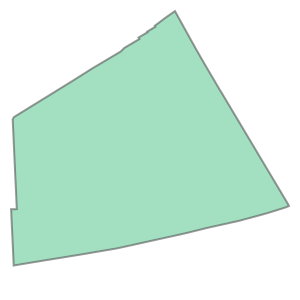

In [61]:
LOR_name

'08401245'

,Bike_ID,Datetime,Latitude,Longitude,x1,y1
0,14578,2022-02-28 07:31:00,52.511884,13.462103,395634.221166,5.819085e+06
1,13391,2022-02-28 07:31:00,52.528450,13.392904,390979.527218,5.821030e+06
2,13008,2022-02-28 07:31:00,52.492096,13.451308,394854.481381,5.816900e+06
3,13503,2022-02-28 07:31:00,52.521414,13.485667,397255.475472,5.820112e+06
4,14575,2022-02-28 07:31:00,52.529268,13.387696,390628.288996,5.821129e+06


395634.2211655109 5819085.4044680735
390979.5272184274 5821030.183357715
394854.4813810722 5816900.206165379
397255.4754718132 5820111.552606736
390628.2889958044 5821129.041608626
394137.6973151479 5814510.350312062
390979.56684388896 5821031.962902111
389103.8943528138 5817971.437957377
391617.7133564471 5819618.387443322
391699.9612291279 5820765.047229179
389103.8943528138 5817971.437957377
393461.5021827401 5816115.754880723
389501.6051115211 5818626.335455528
390628.2889958044 5821129.041608626
392834.0209166136 5818045.573750716
391815.1567712459 5821134.60758147
390628.1103492521 5821130.158369242
392208.26348383777 5820818.927166557
392501.70093651547 5818052.295591231
383896.6648765981 5818784.875846056
395314.783682976 5821002.556329364
390347.13329842815 5821062.777873143
393750.863075722 5818295.338743909
384160.6074128883 5818767.834164375
393752.9422250194 5818300.4122668505
391618.7044145817 5819611.021305412
391845.5126486345 5819368.323214574
391692.73654615897 582075

394232.598747751 5818759.722058753
389057.35899766855 5820003.5342574045
392512.4696966992 5819808.758767732
393117.7785772836 5817484.117868983
394026.0104896167 5818110.563823888
384911.7757806596 5818847.169684467
392814.591642236 5817405.502073771
392651.7082152654 5821809.105638505
389007.7996451568 5820647.177057075
392868.9468412208 5815712.276253039
384950.3599378116 5820027.292207073
391835.2762816419 5823285.020912205
387578.55707219697 5821358.14185348
388031.1219805394 5818889.953192675
390163.1403776538 5817989.424207985
392184.769829698 5819230.429944966
394698.0132169224 5820669.832824499
390854.6406984221 5822359.497705106
389400.25221297727 5815661.971683781
395826.2382447738 5809927.109036223
387387.11454706313 5818213.669938912
387043.2976969344 5816849.176276492
390530.9392889476 5818357.532087849
383773.7056542705 5818364.585016861
393601.32120157895 5815834.646350214
395644.2579203149 5819212.375324418
394228.6718743818 5820489.224984574
388747.88058232726 5822661

392728.2556487965 5816392.789734221
392740.642221552 5814206.425815525
393273.95986492885 5814527.171229599
390062.3438826985 5815428.761731343
389410.9129161429 5817095.42491926
391670.5030403199 5819767.664640259
394981.1311527066 5819123.729759418
393313.9278601103 5816873.178264019
386941.8863674737 5818945.457685913
395389.0400718196 5818943.976146544
392086.9948724041 5821022.673684927
395907.3400129182 5819181.29681099
393097.0452422279 5821694.760486268
394485.7954368079 5818114.106827663
389906.9269462189 5819485.507343508
389901.0097701132 5819433.673863039
394756.4044296759 5818336.064072875
391081.622907164 5820164.739164479
388337.4083971871 5822943.192227888
388366.13943694654 5822787.079695696
389030.8301082513 5823619.792753988
390621.6241894226 5820241.200894837
387374.6022172478 5818493.601854872
389797.23951632495 5820047.587759251
395567.1854624984 5817876.632160451
390774.5543694433 5819742.161501428
388394.55122191017 5819827.416609382
392391.2092238592 5820178.40

388807.4801913568 5816591.633721625
393639.1758097072 5815869.766606559
388126.9890123928 5819508.141644131
391296.7460046656 5818237.999180286
394689.7275810688 5816720.920946655
390552.5144905652 5819924.826998139
395428.30862030096 5819037.497170415
395428.6079406203 5819067.423169127
384624.02638004615 5818060.500779099
393456.5386755036 5817687.607127245
391840.186772962 5823277.011725571
390631.1884583012 5820797.037731309
388699.579679822 5819583.452982533
393767.1217167991 5816253.446428859
387923.8561144677 5822377.888945634
393092.2216987187 5822617.003484855
388806.5379334447 5820975.118187387
393432.0361244304 5817313.368746402
385448.0174739705 5819777.485842757
384606.39619163214 5816682.475359221
384055.6508582298 5819176.162134374
388543.4435700352 5818706.346855866
389687.5194600902 5816402.391790755
394284.1236005338 5818325.088105294
387623.5604454943 5820959.395945931
386140.2078254508 5819439.078443792
392514.2392624072 5822757.631953239
398257.2097898745 5819718.9

393253.0790603992 5820513.621890992
387650.3597018357 5822319.06140678
390371.05989950505 5819466.529657808
388722.0160428564 5820296.014514835
1041989.5138561752 5727306.551329248
390205.9085182699 5820542.383401622
390111.93578339496 5819908.542030868
391493.2698899838 5818354.934335025
389079.4453656884 5815070.656776547
391002.5252180624 5820282.782888074
384398.6705031963 5817227.305632378
393154.4040912279 5817893.142704661
394765.07179871807 5818360.246760109
386328.3878318276 5818115.483197117
387154.53766950726 5818278.888267061
394251.1566541888 5817369.848793161
389001.3634176735 5815883.967720163
390265.0186822633 5819745.316029071
392065.149106885 5821155.350908044
392658.3748320017 5817234.330597585
390000.579654132 5818909.547327811
381502.4571926835 5810882.093232685
391349.17617393576 5821744.929322284
395275.5835562456 5820924.390615389
390593.8875609358 5817095.031285951
394007.0485586855 5821669.852496217
391170.9843891497 5819958.560495192
387180.49203289096 581970

In [78]:

for bindex, brow in dfbikes.iterrows():
    #print(brow['x1'],brow['y1'])
    bikeid=brow['Bike_ID']
    p1 = Point(brow['x1'], brow['y1'])
    for index, row in gdf_plr.iterrows():

        #geo=gdf_plr.iloc[0].geometry
        #LOR_name=gdf_plr.iloc[0].PLR_ID

        namer = (row['PLR_ID'])
        #geo=row['PLR_ID'].geometry
        poly = Polygon(row['geometry'])

        if poly.contains(p1):
            print(f'{bikeid} in {namer}')
            break

14578 in 02500831
13391 in 01100309
13008 in 09100101
13503 in 11300722
14575 in 01100415
13732 in 08100208
13160 in 01100415
13101 in 01100104
13928 in 01100207
13679 in 01100309
13951 in 01100104
14446 in 08100314
13659 in 01100102
13534 in 01100415
14450 in 02300314
14797 in 01100309
15114 in 01100415
14945 in 01100310
13697 in 02300314
15022 in 04300415
14857 in 03601450
15173 in 01100308
14785 in 02300316
16019 in 04300416
15214 in 02300316
16075 in 01100207
15320 in 01100312
13721 in 01100309
15915 in 01100207
15343 in 01100207
16333 in 01100415
14353 in 01100207
19988 in 04300518
14029 in 02100101
14820 in 02400625
15059 in 04300416
16024 in 04501041
16051 in 04300622
15174 in 07200308
13242 in 02500835
14645 in 04500938
14830 in 04500938
13454 in 04500939
16234 in 02400521
13719 in 04200311
13011 in 11300722
14082 in 01100206
13772 in 07200308
14109 in 04300623
14063 in 07100102
14517 in 04501147
14246 in 02400522
14893 in 04501148
16069 in 01200522
14544 in 02400625
15167 in 0

14403 in 08100415
13476 in 07300618
13961 in 04300517
16238 in 08100104
13312 in 08100208
16790 in 01200520
15826 in 08100102
13644 in 01401044
14348 in 01100313
18573 in 08100416
14433 in 08100419
13297 in 01100309
14894 in 01100311
16185 in 01100311
15321 in 11200512
14072 in 04300622
14835 in 04300413
19241 in 01100416
15138 in 01100207
16696 in 07400721
16112 in 08100416
14711 in 08100104
18332 in 01100207
13838 in 09100101
14980 in 01300836
14671 in 01100416
13452 in 02500729
14972 in 02300419
19197 in 02500726
15236 in 08100209
14776 in 08100101
15159 in 08100104
16028 in 08100104
16213 in 07400721
16217 in 02200207
14594 in 01100206
13369 in 02500833
15865 in 08100310
15340 in 04501042
14115 in 02500833
13414 in 01100309
13832 in 02500831
14707 in 03701658
16133 in 02400625
13517 in 01100205
15094 in 01100205
14381 in 02500835
16455 in 01100206
13405 in 01400942
15330 in 01401046
16199 in 01401049
15879 in 01100206
14020 in 04501042
13425 in 01100102
13190 in 02500835
15140 in 0

19069 in 07100206
19297 in 01100312
15481 in 01100206
16825 in 01100309
18487 in 01100102
16908 in 01100206
19217 in 02500834
17576 in 03601142
19301 in 01100206
13974 in 04300622
15578 in 02200211
19363 in 09100101
19251 in 01400942
18989 in 01100206
18955 in 01200522
19081 in 01100308
15197 in 02100105
14393 in 04300623
15460 in 02100104
19118 in 01100206
17257 in 01100310
15411 in 04300414
14125 in 01200628
18929 in 02400521
18932 in 09100101
15484 in 01100102
15408 in 02200212
13366 in 08100102
16815 in 06100205
19099 in 07100204
14112 in 02200211
19276 in 07200413
18949 in 02100105
18983 in 02100101
19345 in 02300417
15464 in 04500938
15470 in 01100101
19033 in 01100310
16599 in 02200213
16424 in 01100310
18542 in 02500834
13339 in 06100103
18091 in 01200520
16604 in 03701556
16801 in 03701554
17526 in 09100101
17939 in 01100206
18766 in 04300413
18378 in 01100309
18197 in 01300835
16393 in 01100206
17809 in 02400520
17347 in 01400938
16544 in 01100205
18292 in 01200628
17620 in 0

In [ ]:
#bike location dataframe
csvpath = "nextbike_converted_test.csv"
dfbikes = pd.read_csv(csvpath)
dfbikes.head()

#gdf_plr
path_to_daza_plr = "data/LOR_shpfiles/lor_plr.shp"
gdf_plr = geopandas.read_file(path_to_daza_plr)

In [135]:
def find_poly(x,y):
    p1 = Point(x, y)
    PLR_name="0"
    for index, row in gdf_plr.iterrows():
        #namer = (row['PLR_ID'])
        poly = Polygon(row['geometry'])
        if poly.contains(p1):
                #print(f'{bikeid} in {namer}')
                PLR_name = (row['PLR_ID'])
                return PLR_name

In [101]:
dfbikes.head()

,Bike_ID,Datetime,Latitude,Longitude,x1,y1,plr
0,14578,2022-02-28 07:31:00,52.511884,13.462103,395634.221166,5.819085e+06,
1,13391,2022-02-28 07:31:00,52.528450,13.392904,390979.527218,5.821030e+06,
2,13008,2022-02-28 07:31:00,52.492096,13.451308,394854.481381,5.816900e+06,
3,13503,2022-02-28 07:31:00,52.521414,13.485667,397255.475472,5.820112e+06,
4,14575,2022-02-28 07:31:00,52.529268,13.387696,390628.288996,5.821129e+06,


In [109]:
#dfbikes.iloc[0].x1
#print(find_poly(dfbikes.iloc[0].x1, dfbikes.iloc[0].y1))
#This doesnot work yet
#dfbikes['plr']=dfbikes.apply(find_poly(dfbikes.iloc[0].x1, dfbikes.iloc[0].y1))
#dfbikes['plr']=dfbikes['plr'].map(find_poly(dfbikes.iloc[0].x1, dfbikes.iloc[0].y1))
dfbikes['plr']=dfbikes.apply(find_poly(float(dfbikes.x1), float(dfbikes.y1)))
dfbikes['plr']=float(dfbikes.apply(find_poly(dfbikes.x1, dfbikes.y1)))

#df['A'] = df['A'].map(addOne)

TypeError: cannot convert the series to <class 'float'>

In [128]:
dfbikes.head()

,Bike_ID,Datetime,Latitude,Longitude,x1,y1,plr
0,14578,2022-02-28 07:31:00,52.511884,13.462103,395634.221166,5.819085e+06,02500831
1,13391,2022-02-28 07:31:00,52.528450,13.392904,390979.527218,5.821030e+06,
2,13008,2022-02-28 07:31:00,52.492096,13.451308,394854.481381,5.816900e+06,
3,13503,2022-02-28 07:31:00,52.521414,13.485667,397255.475472,5.820112e+06,
4,14575,2022-02-28 07:31:00,52.529268,13.387696,390628.288996,5.821129e+06,


In [104]:
print(dfbikes.iloc[0].x1

02500831


In [107]:
float(dfbikes.iloc[0].x1)

395634.2211655109

In [115]:
print(find_poly(dfbikes.iloc[0].x1, dfbikes.iloc[0].y1))

02500831


In [127]:
dfbikes.iloc[0].x1
dfbikes.at[0,'plr']=find_poly(dfbikes.iloc[0].x1, dfbikes.iloc[0].y1)


In [118]:
dfbikes.at[0,'plr']

'02500831'

In [139]:
dfbikes.y1[0]

5819085.4044680735

In [142]:
#dfbikes['plr']=dfbikes.applymap(find_poly, x=dfbikes.x1, y=dfbikes.y1)
#find_poly() takes 2 positional arguments but 3 were given
df.apply(find_poly, args=(dfbikes.x1, dfbikes.y1), axis=1)

#cannot convert the series to <class 'float'>
#df = df.apply(subtract, args=(1, 2))


#dfbikes['plr']=dfbikes.apply(find_poly(dfbikes.x1, dfbikes.y1))
#cannot convert the series to <class 'float'>

#dfbikes['plr']=dfbikes['plr'].map(find_poly(dfbikes.x1, dfbikes.y1))
#'DataFrame' object has no attribute 'map' - without column
#cannot convert the series to <class 'float'>

TypeError: find_poly() takes 2 positional arguments but 3 were given